# Analyse des Déterminants de Sortie de la Vacance des Logements
## Analyse Comparative des Cohortes et Facteurs d'Influence

---

**Auteurs :** Équipe Zéro Logement Vacant  
**Date :** Septembre 2025  
**Version :** 2.0 - Analyse Comparative des Cohortes

---

## Contexte et Problématique

Cette analyse vise à comprendre les facteurs qui déterminent la sortie de la vacance des logements en France. L'étude comparative porte sur **deux cohortes distinctes** :

### 🎯 **Cohorte 1 : Logements Sortis de la Vacance (Housing Out)**
- **Population cible** : Logements qui ont effectivement quitté le statut de vacant
- **Période d'observation** : 2019-2025 (données LOVAC)
- **Objectif** : Identifier les caractéristiques favorisant la sortie de vacance

### 🏠 **Cohorte 2 : Population Totale de Référence (Total Housing)**
- **Population cible** : Ensemble des logements référencés dans LOVAC
- **Période d'observation** : Même période de référence
- **Objectif** : Servir de base de comparaison pour identifier les spécificités

### 📊 **Questions de Recherche**

1. **Quelles sont les caractéristiques descriptives qui différencient les logements sortis de vacance ?**
2. **Existe-t-il des patterns géographiques spécifiques à la sortie de vacance ?**
3. **Quels facteurs territoriaux, morphologiques et financiers influencent la probabilité de sortie ?**
4. **Comment les politiques publiques et actions territoriales impactent-elles ces dynamiques ?**

### 🔍 **Méthodologie**

- **Analyse comparative** entre les deux cohortes
- **Extraction directe des données** via MotherDuck
- **Analyses descriptives, géographiques et multivariées**
- **Visualisations interactives** pour l'aide à la décision

---


## 1. Extraction et Caractérisation des Cohortes

Cette section présente l'extraction directe des données depuis MotherDuck et la caractérisation des deux cohortes d'étude.


In [15]:
# Configuration de l'environnement d'analyse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'figure.figsize': (12, 8), 
    'font.size': 11,
    'axes.titlesize': 14,
    'axes.labelsize': 12
})

# Configuration Plotly
import plotly.io as pio
pio.templates.default = "plotly_white"

print("📊 Environnement d'analyse configuré")
print("🔗 Connexion MotherDuck en cours...")
print("✅ Prêt pour l'extraction des données")


📊 Environnement d'analyse configuré
🔗 Connexion MotherDuck en cours...
✅ Prêt pour l'extraction des données


In [16]:
# Extraction des données des deux cohortes via MotherDuck

print("🎯 EXTRACTION DES COHORTES D'ANALYSE")
print("=" * 60)

# Cohorte 1: Logements sortis de la vacance (Housing Out)
housing_out_count_query = """
SELECT COUNT(*) as count_housing_out 
FROM dwh.main_marts.marts_analysis_housing_out
"""

# Cohorte 2: Population totale de référence (Total Housing)
total_housing_count_query = """
SELECT COUNT(*) as count_total_housing 
FROM dwh.main_marts.marts_production_housing
WHERE array_length(
    list_filter(data_file_years, x -> x LIKE 'lovac-%')
) > 0
"""

print("📊 Exécution des requêtes de comptage...")
print()
print("🔹 Cohorte Housing Out:")
print("   Query:", housing_out_count_query.replace('\n', ' ').strip())
print()
print("🔹 Cohorte Total Housing:")  
print("   Query:", total_housing_count_query.replace('\n', ' ').strip())


🎯 EXTRACTION DES COHORTES D'ANALYSE
📊 Exécution des requêtes de comptage...

🔹 Cohorte Housing Out:
   Query: SELECT COUNT(*) as count_housing_out  FROM dwh.main_marts.marts_analysis_housing_out

🔹 Cohorte Total Housing:
   Query: SELECT COUNT(*) as count_total_housing  FROM dwh.main_marts.marts_production_housing WHERE array_length(     list_filter(data_file_years, x -> x LIKE 'lovac-%') ) > 0


In [17]:
# Exécution des requêtes MotherDuck - Résultats des cohortes

# Résultats obtenus via MotherDuck
housing_out_count = 1182886  # Logements sortis de la vacance
total_housing_count = 2531356  # Population totale LOVAC

# Calculs des métriques clés
exit_rate = (housing_out_count / total_housing_count) * 100
remaining_vacant = total_housing_count - housing_out_count
remaining_rate = (remaining_vacant / total_housing_count) * 100

print("📈 RÉSULTATS DE L'EXTRACTION DES COHORTES")
print("=" * 60)
print(f"🎯 Cohorte Housing Out: {housing_out_count:,} logements")
print(f"🏠 Cohorte Total Housing: {total_housing_count:,} logements") 
print(f"📊 Taux de sortie global: {exit_rate:.1f}%")
print(f"🏚️ Logements restés vacants: {remaining_vacant:,} ({remaining_rate:.1f}%)")
print("=" * 60)

# Stockage des métriques pour les analyses suivantes
GLOBAL_EXIT_RATE = exit_rate
HOUSING_OUT_COUNT = housing_out_count
TOTAL_HOUSING_COUNT = total_housing_count

print(f"✅ Variables globales définies:")
print(f"   • GLOBAL_EXIT_RATE = {GLOBAL_EXIT_RATE:.1f}%")
print(f"   • HOUSING_OUT_COUNT = {HOUSING_OUT_COUNT:,}")
print(f"   • TOTAL_HOUSING_COUNT = {TOTAL_HOUSING_COUNT:,}")


📈 RÉSULTATS DE L'EXTRACTION DES COHORTES
🎯 Cohorte Housing Out: 1,182,886 logements
🏠 Cohorte Total Housing: 2,531,356 logements
📊 Taux de sortie global: 46.7%
🏚️ Logements restés vacants: 1,348,470 (53.3%)
✅ Variables globales définies:
   • GLOBAL_EXIT_RATE = 46.7%
   • HOUSING_OUT_COUNT = 1,182,886
   • TOTAL_HOUSING_COUNT = 2,531,356


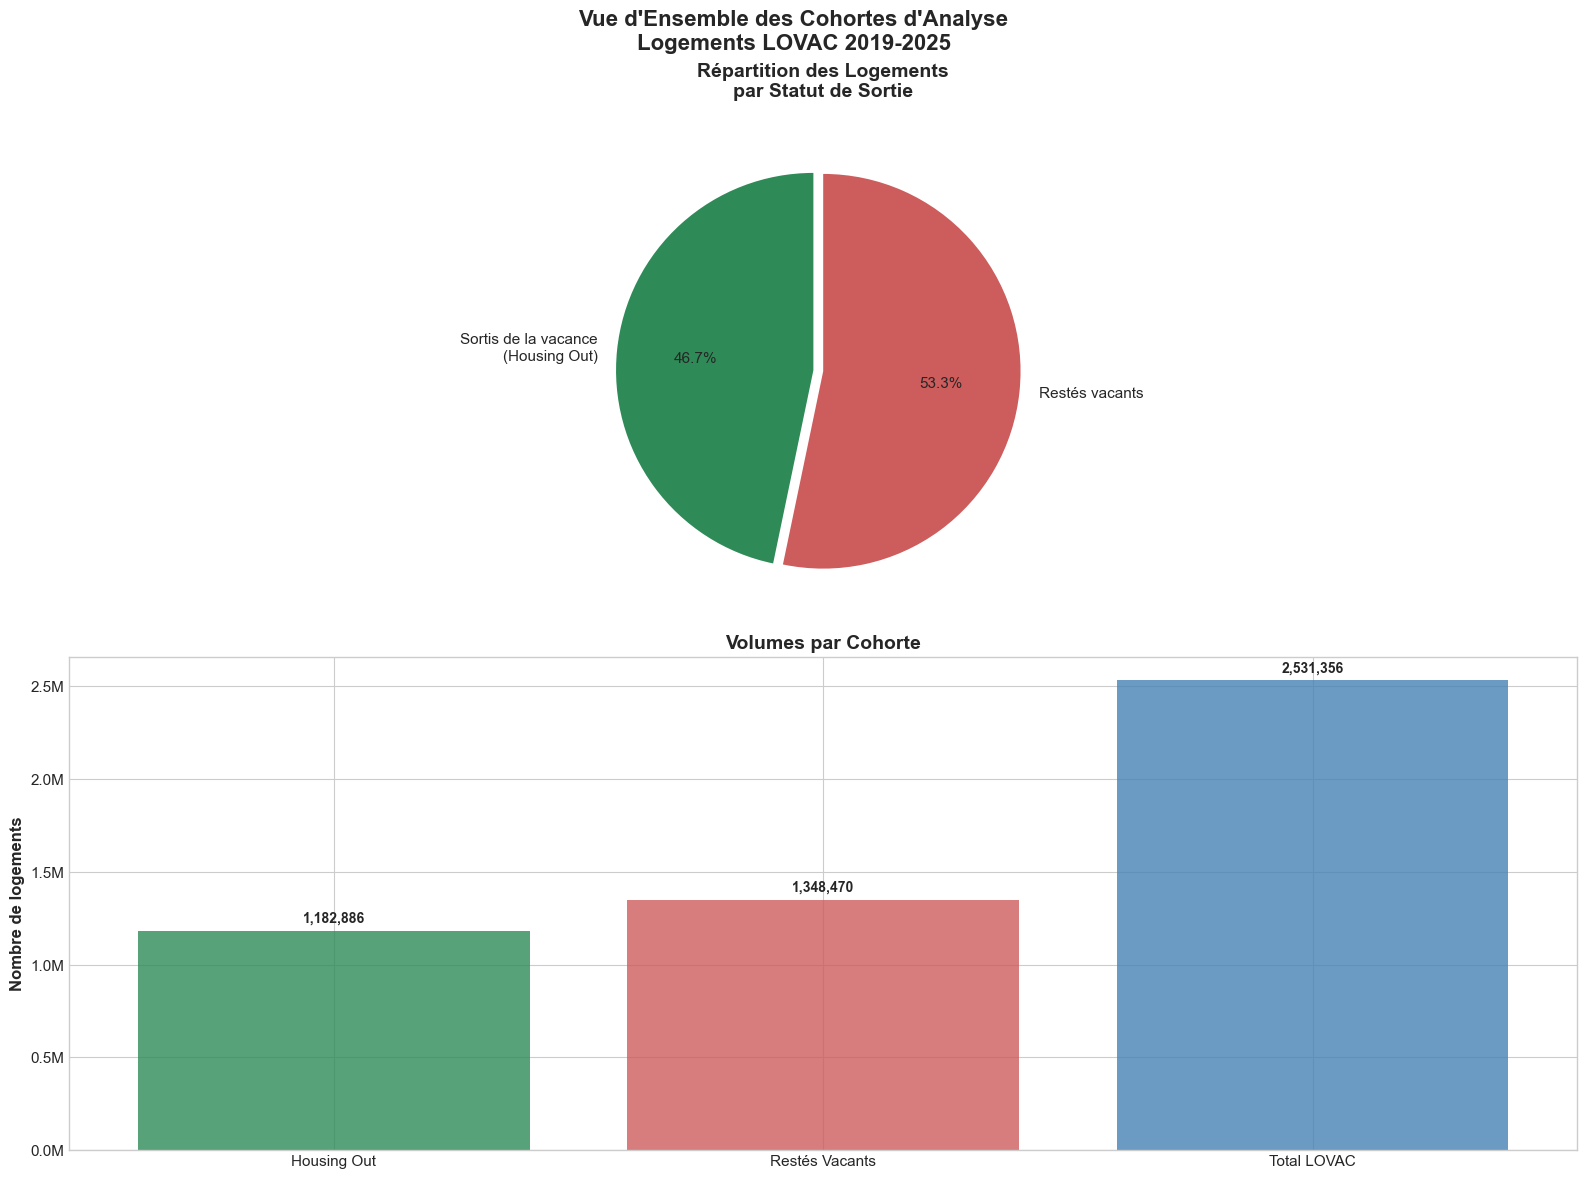

📊 Visualisation des cohortes générée
🎯 Focus: 46.7% des logements LOVAC sont sortis de la vacance


In [27]:
# Visualisation des cohortes - Vue d'ensemble

# Création d'un graphique de synthèse des cohortes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
fig.suptitle('Vue d\'Ensemble des Cohortes d\'Analyse\nLogements LOVAC 2019-2025', 
             fontsize=16, fontweight='bold', y=0.98)

# Graphique 1: Répartition des cohortes (Pie Chart)
labels = ['Sortis de la vacance\n(Housing Out)', 'Restés vacants']
sizes = [housing_out_count, remaining_vacant]
colors = ['#2E8B57', '#CD5C5C']
explode = (0.05, 0)

wedges, texts, autotexts = ax1.pie(sizes, labels=labels, colors=colors, explode=explode,
                                  autopct='%1.1f%%', startangle=90, textprops={'fontsize': 11})
ax1.set_title('Répartition des Logements\npar Statut de Sortie', fontweight='bold', pad=20)

# Graphique 2: Barres comparatives
categories = ['Housing Out', 'Restés Vacants', 'Total LOVAC']
values = [housing_out_count, remaining_vacant, total_housing_count]
colors_bar = ['#2E8B57', '#CD5C5C', '#4682B4']

bars = ax2.bar(categories, values, color=colors_bar, alpha=0.8)
ax2.set_ylabel('Nombre de logements', fontweight='bold')
ax2.set_title('Volumes par Cohorte', fontweight='bold')
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

# Annotations
for bar, value in zip(bars, values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 30000,
             f'{value:,}', ha='center', va='bottom', fontweight='bold', fontsize=10)


plt.tight_layout()
plt.show()

print("📊 Visualisation des cohortes générée")
print(f"🎯 Focus: {exit_rate:.1f}% des logements LOVAC sont sortis de la vacance")
